In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


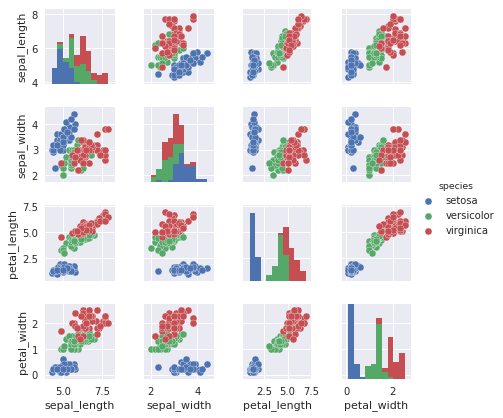

In [2]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [3]:
X_iris =  iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

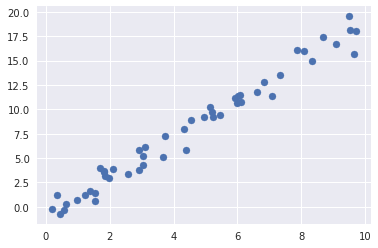

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)

y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)


In [6]:
from sklearn.linear_model import  LinearRegression


In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
x.shape

(50,)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
y.shape

(50,)

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311146

In [14]:
xfit = np.linspace(-1, 11)

In [15]:
Xfit = xfit[:, np.newaxis]

In [16]:
yfit = model.predict(Xfit)

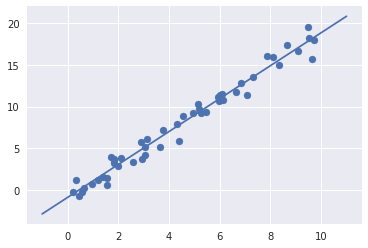

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [18]:
from sklearn.cross_validation import  train_test_split

/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [22]:
from sklearn.decomposition import  PCA
model = PCA(n_components=2)
model.fit(X_iris)

X_2D = model.transform(X_iris)


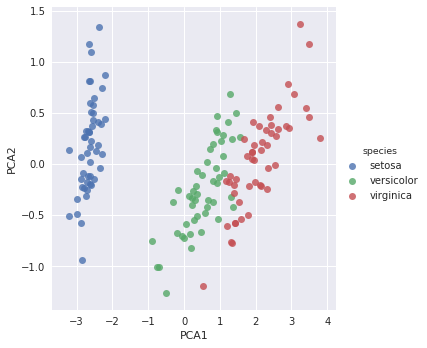

In [23]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [24]:
from sklearn.mixture import  GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/

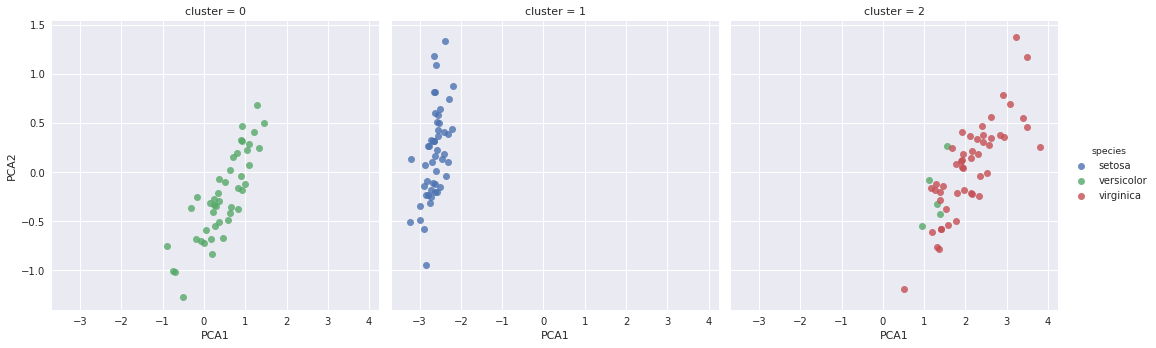

In [25]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [27]:
import matplotlib.pyplot as plt

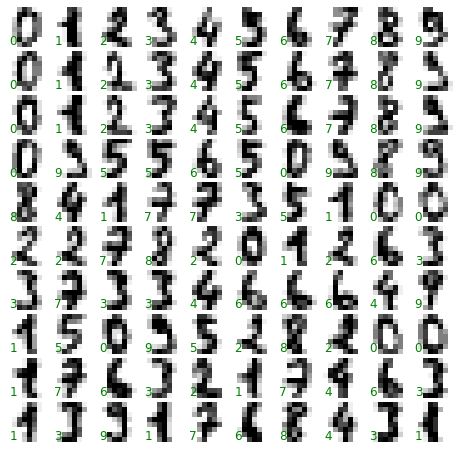

In [30]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [31]:
X = digits.data
X.shape

(1797, 64)

In [32]:
y = digits.target
y.shape

(1797,)

In [33]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

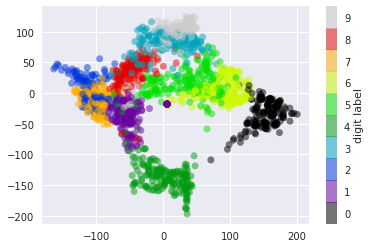

In [39]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)


In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [43]:
from sklearn.metrics import  accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

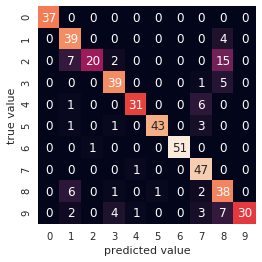

In [45]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')